---
# Data Analysis and Machine Learning
---
## Assessment 01

One popular area of application for machine learning in chemistry is the prediction of molecular properties; these are time- and resource-intensive to calculate using traditional computational chemical programs, but can be predicted using machine-learning models in a tiny fraction of the time.

Your dataset contains computational chemical data for iron-containing molecules - feature vectors that describe their structure (***X***), and a selection of their properties (***y***). Your task is to build two machine-learning models:
- a **regression model for predicting the HOMO-LUMO gap** (one of the properties that you are provided with); the HOMO-LUMO gap is the smallest amount of energy needed to excite an electron in a molecule, and is a useful property to know for optoelectronics applications.
- a **classification model for predicting whether the number of neighbouring atoms around the iron atom in the molecule is i) less than 6, ii) 6, or iii) greater than 6**; the number of neighbouring atoms is called the '*coordination number*', and it tells us about the three-dimensional structure of the molecule.

The full dataset contains 4446 examples. Each molecule is encoded as a feature vector of 40 values, and there are 9 possible target values to predict. A train/test (0.95/0.05) split has already been carried out and you only have access to the training dataset (containing 4223 examples). The testing dataset (containing the remaining 223 examples) is hidden - **you are not going to receive a copy of this.**

There are two .csv files in this directory:
- `x_train.csv`, containing 4223 examples with 40 features each.
- `y_train.csv`, containing 4223 examples with 9 targets each.

If you cannot get code to work, comment it out and write comments about what you are trying to do and how it fails. All code should generally be commented where appropriate as good practice dictates. When you have finished, use the option on the File menu to download this notebook as in .ipynb format and upload it to the submission point on the VLE.

Before you start, click the &#x25B8; icon below to allow colab to access the data files in your drive.

In [1]:
from google.colab import drive; drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


... and click the &#x25B8; icon below to import the `numpy` and `matplotlib.pyplot` libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### Task 01

Build and fit a regression model to predict the HOMO-LUMO gap (`HL_Gap`) in `y_train.csv` using the molecular feature vectors in `x_train.csv` as the input. Evaluate your regression model using the mean-squared error (MSE), and optimise the hyperparameters of your regression model to obtain the best performance possible on unseen data.

You can use any regression model implemented in Scikit-Learn; you are not restricted to models that we have discussed in the lectures and associated workshops. Show evidence that you have:

- considered more than one regression model.
- optimised the hyperparameters of your chosen regression model on held-out data.
- evaluated your chosen regression model on held-out data.

In [3]:
from sklearn.metrics import mean_squared_error, r2_score
# Load feature vectors
x_train = pd.read_csv('/content/drive/MyDrive/MLAssessment/x_train.csv')

# Load HOMO-LUMO gap values
y_train = pd.read_csv('/content/drive/MyDrive/MLAssessment/y_train.csv')['HL_Gap']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score


In [5]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

# Used KNN Regression model

In [6]:
from sklearn.neighbors import KNeighborsRegressor

# Creating a pipeline with standard scaling and KNN regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor())
])

# Creating the hyperparameters grid to search
param_grid = {
    'model__n_neighbors': [1, 3, 5, 7, 9],  # Adjust as needed
    'model__weights': ['uniform', 'distance'],
}

# Using GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Using MSE as the scoring metric
    cv=5  # 5-fold cross-validation
)

# Fitting the grid search to the training data
grid_search.fit(x_train, y_train)

# Getting the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predicting on the test set using the best model
y_predict = best_model.predict(x_test)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_predict)
print(f'Mean Squared Error on Test Set: {mse}')


# Creating scores for cross validation
scores = cross_val_score(pipeline, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print the scores
print(f'Cross-validated MSE scores: {scores}')


# Print the best hyperparameters
print('Best Hyperparameters:', best_params)

# Calculating R-squared
r_squared = r2_score(y_test, y_predict)
print(f'R-squared: {r_squared}')




Mean Squared Error on Test Set: 0.0009320406225926713
Cross-validated MSE scores: [-0.00088335 -0.00088073 -0.00093547 -0.0009527  -0.00092985]
Best Hyperparameters: {'model__n_neighbors': 9, 'model__weights': 'distance'}
R-squared: 0.2688274437749677


# Used Lasso Regression

In [7]:
from sklearn.linear_model import Lasso

# Create a pipeline with standard scaling and Lasso regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])

# Hyperparameters for grid search
param_grid = {
    'model__alpha': [0.001, 0.002, 0.003, 0.004, 0.005]
}

# Creating GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fitting the pipeline to the training data
grid_search.fit(x_train, y_train)

# Predicting on the test set
y_predict = grid_search.predict(x_test)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_predict)
print(f'Mean Squared Error on Test Set: {mse}')


# Creating scores for cross validation
scores = cross_val_score(pipeline, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print the scores
print(f'Cross-validated MSE scores: {scores}')

# Print the best hyperparameters
best_alpha = grid_search.best_params_['model__alpha']
print(f'Best alpha: {best_alpha}')

# Calculating R-squared
r_squared = r2_score(y_test, y_predict)
print(f'R-squared: {r_squared}')

Mean Squared Error on Test Set: 0.001256803688048296
Cross-validated MSE scores: [-0.00119762 -0.00118079 -0.00127155 -0.00119584 -0.0012161 ]
Best alpha: 0.002
R-squared: 0.014055457468054922


# Used Linear Regression Model

In [8]:
from sklearn.linear_model import LinearRegression

# Creating a pipeline for linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Example: StandardScaler for preprocessing
    ('model', LinearRegression())  # Linear Regression as the model
])

# Fitting the pipeline to the training data
pipeline.fit(x_train, y_train)

# Predicting on the test set
y_predict = pipeline.predict(x_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_predict)
print(f'Mean Squared Error: {mse}')



# Creating scores for cross validation
scores = cross_val_score(pipeline, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print the scores
print(f'Cross-validated MSE scores: {scores}')

# Calculating R-squared
r_squared = r2_score(y_test, y_predict)
print(f'R-squared: {r_squared}')

# Linear model doesn't have hyper parameter to tune


Mean Squared Error: 0.0012308879157783771
Cross-validated MSE scores: [-0.00216106 -0.0011408  -0.00117994 -0.0011743  -0.00118809]
R-squared: 0.03438601066264835


# Used Decision Tree Regressor

In [9]:
# The model will take 11sec or something to run
from sklearn.tree import DecisionTreeRegressor

# Create a pipeline with standard scaling and Decision Tree regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeRegressor())
])

# Hyperparameters for grid search
param_grid = {
    'model__max_depth': [5, 10, 15],  # Adjust the values as needed
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Creating GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fitting the pipeline to the training data
grid_search.fit(x_train, y_train)

# Predicting on the test set
y_predict = grid_search.predict(x_test)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_predict)
print(f'Mean Squared Error on Test Set: {mse}')


# Creating scores for cross validation
scores = cross_val_score(pipeline, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print the scores
print(f'Cross-validated MSE scores: {scores}')

# Print the best hyperparameters
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Calculating R-squared
r_squared = r2_score(y_test, y_predict)
print(f'R-squared: {r_squared}')

Mean Squared Error on Test Set: 0.0010284622109186122
Cross-validated MSE scores: [-0.00133607 -0.00148626 -0.00140199 -0.00134579 -0.0014816 ]
Best hyperparameters: {'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2}
R-squared: 0.19318608490860978


From the above analysis we can select KNN Regression model as best fit as the MSE is minimum for it and the RSquare is better than the rest.

#### **You will not be able to run the code below as you do not have access to `x_test.csv` and `y_test.csv`.**

> This code will load the hidden testing data from `x_test.csv` and `y_test.csv`, predict the HOMO-LUMO gap using your model (assuming your model is assigned to the variable name `model`; **change the code below if you have used a different name!**), and evaluate the final model performance against the values in `y_test.csv` using the mean squared error. Your performance on the hidden testing data is a graded component of the assessment.

> Ensure that your final chosen model is complete, fit, and ready to predict after running the last block of code, as the block below will be run afterwards and is expected to run without error.

#### **You will not be able to run the code below as you do not have access to `x_test.csv` and `y_test.csv`.**

In [10]:
# YOU WILL NOT BE ABLE TO RUN THIS CODE!

from sklearn.metrics import mean_squared_error

x_test = np.genfromtxt('x_test.csv', delimiter = ',')
y_test = np.genfromtxt('y_test.csv', delimiter = ',')

y_predict = model.predict(x_test)

mse = mean_squared_error(y_test, y_predict)

print(f'Final MSE: {mse:.6f}')

FileNotFoundError: ignored

### Task 02

Build and fit a classification model to predict whether the transition metal has i) less than 6, ii) 6, or iii) more than six neighbouring atoms using the molecular feature vectors in `x_train.csv` as the input. The number of neighbouring atoms (`MND`) is given in `y_train.csv`. Create the following class labels for each of the examples:

- **0** (where `MND` < 6)
- **1** (where `MND` == 6)
- **2** (where `MND` > 6)

and use these class labels as targets for your classification model. Evaluate your classification model using the accuracy, and optimise the hyperparameters of your classification model to obtain the best performance possible on unseen data.

You can use any classification model implemented in Scikit-Learn; you are not restricted to models that we have discussed in the lectures and associated workshops. Show evidence that you have:

- tested more than one classification model.
- optimised the hyperparameters of your chosen classification model on held-out data.
- evaluated your chosen classification model on held-out data.

In [16]:
#Re-run the code after getting accuracy for RandomForestClassifier to get the correct accuracy of KNN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier


# Load data
x_train = pd.read_csv('/content/drive/MyDrive/MLAssessment/x_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/MLAssessment/y_train.csv', header=None, names=['MND'])


# Now, lengths should match
#print(len(x_train), len(y_train))

y_train['MND'] = pd.to_numeric(y_train['MND'], errors='coerce')

# Dropped the rows with NaN values in y_train
y_train = y_train.dropna()

# Now, lengths is match
#print(len(x_train), len(y_train))

# Used RandomForestClassifier

Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 15}


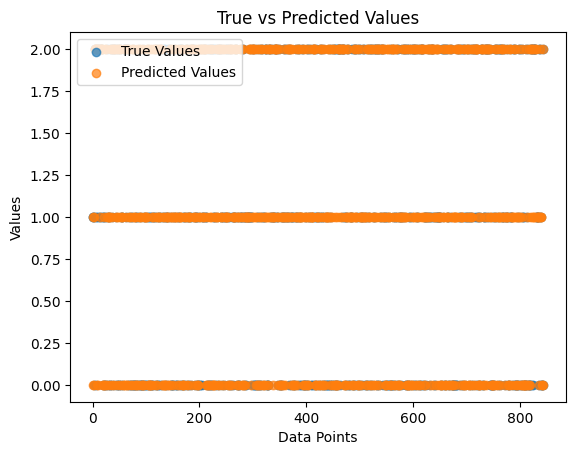

In [12]:
# Converted MND values to classes: 0 (MND < 6), 1 (MND == 6), 2 (MND > 6)

y_train['Class'] = np.where(y_train['MND'] < 6, 0, np.where(y_train['MND'] == 6, 1, 2))

# Data has been split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train['Class'], test_size=0.2, random_state=1)



#The below code will take around 41sec to run
# Setting the RandomForestClassifier
model = RandomForestClassifier()
# The parameter grid to search
param_dist = {
    'n_estimators': [25, 50, 75],
    'max_depth': [10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2],
}

# Used RandomizedSearchCV to search for the best parameters
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(x_train, y_train)
best_params = random_search.best_params_


print(f'Best Hyperparameters: {best_params}')

# Make predictions on the test set using the best model
best_model = random_search.best_estimator_
y_predict = best_model.predict(x_test)

#print("The data for MND has been classified if MND is less than 6 than 0 else 1"+y_predict)


plt.scatter(np.arange(len(y_test)), y_test, label='True Values', alpha=0.7)

# Plot the predicted values
plt.scatter(np.arange(len(y_test)), y_predict, label='Predicted Values', alpha=0.7)

plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.show()


In [13]:
# Evaluating the accuracy of the best model
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy of the Best Model: {int(accuracy * 100)} %')

Accuracy of the Best Model: 68 %


# Used KNN Classifier

In [17]:

# Creating a class in data frame creating three cluster for MND < 6, MND = 6 and MND > 6
y_train['Class'] = np.where(y_train['MND'] < 6, 0, np.where(y_train['MND'] == 6, 1, 2))



# Spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train['Class'], test_size=0.2, random_state=42)

# The parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create a KNN Classifier
knn_model = KNeighborsClassifier()

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_predict = best_model.predict(x_test)

# The accuracy of the best model
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy of the Best Model: {int(accuracy * 100)}%')


Best Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Accuracy of the Best Model: 70%


From above we can conclude that KNN is the best Classifier as it provides good accuracy than Randome Forest Classifier in the above dataframe.

#### **You will not be able to run the code below as you do not have access to `x_test.csv` and `y_test.csv`.**

This code will load the hidden testing data from `x_test.csv` and `y_test.csv`, predict the class label using your model (assuming your model is assigned to the variable name `model`; **change the code below if you have used a different name!**), and evaluate the final model performance against the values in `y_test.csv` using the accuracy. Your performance on the hidden testing data is a graded component of the assessment.

Ensure that your final chosen model is complete, fit, and ready to predict after running the last block of code, as the block below will be run afterwards and is expected to run without error.

#### **You will not be able to run the code below as you do not have access to `x_test.csv` and `y_test.csv`.**

In [ ]:
# YOU WILL NOT BE ABLE TO RUN THIS CODE!

from sklearn.metrics import accuracy_score

x_test = np.genfromtxt('x_test.csv', delimiter = ',')
y_test = np.genfromtxt('y_test.csv', delimiter = ',')

y_predict = model.predict(x_test)

accuracy = accuracy_score(y_test, y_predict)

print(f'Final Accuracy: {accuracy:.6f}')